# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.3


# **Basic Understanding of The Data**

In [4]:
# Import Data & show sample

df = pd.read_csv('/content/hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
47235,City Hotel,1,30,2018,April,7,13,0,1,2,...,0,No Deposit,9.0,NaN,0,Personal,81.9,0,0,Canceled
64868,City Hotel,1,46,2019,May,11,18,1,1,2,...,0,No Deposit,138.0,NaN,0,Personal,63.0,0,0,Canceled
9239,Resort Hotel,1,46,2018,January,45,5,1,1,2,...,0,No Deposit,240.0,NaN,0,Personal,37.8,0,2,Canceled
91777,City Hotel,0,192,2018,August,26,24,0,2,1,...,0,No Deposit,34.0,NaN,0,Family,95.0,0,0,Check-Out
33885,Resort Hotel,0,7,2019,May,9,2,1,3,1,...,1,No Deposit,NaN,223.0,0,Family,29.0,0,0,Check-Out


# **Data Exploration**

In [5]:
# Show Data Rows & Features Number

print("Total Rows :", df.shape[0])
print("Total Features :", df.shape[1])

Total Rows : 119390
Total Features : 29


In [6]:
# Check duplicated value

df.duplicated().sum()

33261

In [7]:
# Show Data Info

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='Feature,Data Type,Null, Null (%),Unique,Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null,Null (%),Unique,Unique Sample
0,hotel,object,0,0.000000,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.000000,2,"[0, 1]"
2,lead_time,int64,0,0.000000,479,"[342, 737, 7, 13, 14]"
3,arrival_date_year,int64,0,0.000000,3,"[2017, 2018, 2019]"
4,arrival_date_month,object,0,0.000000,12,"[September, October, November, December, January]"
5,arrival_date_week_number,int64,0,0.000000,53,"[27, 28, 29, 30, 31]"
6,arrival_date_day_of_month,int64,0,0.000000,31,"[1, 2, 3, 4, 5]"
7,stays_in_weekend_nights,int64,0,0.000000,17,"[0, 1, 2, 4, 3]"
8,stays_in_weekdays_nights,int64,0,0.000000,35,"[0, 1, 2, 3, 4]"
9,adults,int64,0,0.000000,14,"[2, 1, 3, 4, 40]"


From the data information:
- Untuk kolom `children` karena merupakan data jumlah anak, maka tipe data yang sesuai adalah int64 bukan float64
- Untuk kolom `agent` dan `company` karena merupakan data ID, maka tipe data yang sesuai adalah int64 bukan float65
- Kolom `Meal` memiliki value "Undifinied" yang nantinya akan diubah menjadi "No Meal"

Then we can see that:
- The dataframe has a total of 119390 rows and 36 columns
- Dalam dataframe ini memiliki 119390 baris dan 29 kolom.
- Dalam dataframe ini memiliki nilai *null* di kolom `children`, `country`, `agent`, `company` dan memiliki persentase yang besar sehingga perlu treatment lebih lanjut.

In [8]:
# Numeric Statistic Value

df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Insight:
- Dalam kolom `adults` terrdapat nilai 0, maka kita perlu melakukan analisis lebih lanjut dikarenakan tidak mungkin pemesanan hotel dilakukan tanpa orang dewasa 
- Kolom `adr` (average daily rate) memiliki nilai negatif, kita perlu melakukan analisis lebih lanjut dikarenakan `adr` tidak mungkin memiliki nilai negatif
- Kolom `adr` juga memiliki nilai yang sangat tinggi dengan 5400

In [9]:
# Categorical Statistic Value

df.describe(include = 'O').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


# **Data Preprocessing**

In [10]:
# Initate df_clean
df_clean = df.copy()

## **Handle duplicated values**

In [11]:
df_clean.duplicated().sum()

33261

## **Handle missing values**

In [12]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,company,112593,94.307
1,agent,16340,13.686
2,city,488,0.409
3,children,4,0.003


Ditemukan 4 kolom yang memiliki missing values:

*   company
*   agent
*   city
*   children

Treatment:

*   Kolom `children` karena hanya memiliki 4 baris data yang kosong maka missing value tersebut akan di hapus
*   Dikarekan ada 333 nilai unique dalam Kolom `agent` dan imputasi akan menjadi langkah yang ceroboh maka feature ini akan di drop
*   Kolom `company` karena memilik persentase missing value (94%) maka feature `company` dapat di drop
*   Kolom `city` karena sebagian besar nilainya adalah Kota Denpasar dan missing value rationya kecil, maka missing value tersebut akan diisi dengan nilai Kota Denpasar


In [13]:
#Remove rows that have no children data
df_clean.dropna(subset=['children'], inplace=True)

#Drop feature company & agent
df_clean.drop(columns=['company','agent'], inplace = True)

#Fill NaN value in city with the value of mode (most frequent value of the feature)
df_clean['city'].fillna(df_clean['city'].mode()[0], inplace = True)

In [14]:
# Check Null value

df_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
dtype: int64

## **Adjust Data Type**

In [15]:
# Change data type children to integer type: 
df_clean['children'] = df_clean['children'].astype(int)

## **Feature extraction (Add New Features)**


> **Total Stays**
</br>Dari kolom `stays_in_weekend_nights` dan `stays_in_weekdays_nights`, kita bisa mendapatkan total jumlah hari menginap.



In [16]:
df_clean['total_stays'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_weekdays_nights']
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stays
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,3,No Deposit,0,Personal,0.0,0,0,Check-Out,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0,4,No Deposit,0,Personal,0.0,0,0,Check-Out,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,No Deposit,0,Personal,75.0,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,0,No Deposit,0,Personal,75.0,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,No Deposit,0,Personal,98.0,0,1,Check-Out,2



> **Total Guest**
</br>Dari kolom `adults, children and babies` kita bisa mendapatkan total jumlah orang yang menginap



In [17]:
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stays,total_guests
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,0,Personal,0.0,0,0,Check-Out,0,2
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,0,Personal,0.0,0,0,Check-Out,0,2
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,0,Personal,75.0,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,0,Personal,75.0,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,0,Personal,98.0,0,1,Check-Out,2,2


## Handle Incorrect Value

In [18]:
# there are a value of a adr columns that below 0 & above 5000
df_clean.drop(df_clean[df_clean['adr'] < 0].index, inplace = True)
df_clean.drop(df_clean[df_clean['adr'] > 5000].index, inplace = True)

# since it's impossible to have 0 adults to book a hotel room 
df_clean.loc[(df_clean.adults <= 0,'adults')] = 1

# Replace 'Undefined' in 'meal' column with 'No Meal'
df_clean['meal'] = df_clean['meal'].replace(['Undefined'], 'No Meal')

# Drop Anomaly Data in total stays = 0
df_clean.drop(index = df_clean[(df_clean['stays_in_weekend_nights'] + df_clean['stays_in_weekdays_nights']) == 0].index, inplace = True)

# Drop Anomaly Data in total guest = 0
df_clean.drop(index = df_clean[(df_clean['adults'] + df_clean['children'] + df_clean['babies']) == 0].index, inplace = True)

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118669 entries, 2 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118669 non-null  object 
 1   is_canceled                     118669 non-null  int64  
 2   lead_time                       118669 non-null  int64  
 3   arrival_date_year               118669 non-null  int64  
 4   arrival_date_month              118669 non-null  object 
 5   arrival_date_week_number        118669 non-null  int64  
 6   arrival_date_day_of_month       118669 non-null  int64  
 7   stays_in_weekend_nights         118669 non-null  int64  
 8   stays_in_weekdays_nights        118669 non-null  int64  
 9   adults                          118669 non-null  int64  
 10  children                        118669 non-null  int64  
 11  babies                          118669 non-null  int64  
 12  meal            

# **Monthly Hotel Booking Analysis Based on Hotel Type**

## **Number of Booking Percentage based on Hotel Type**

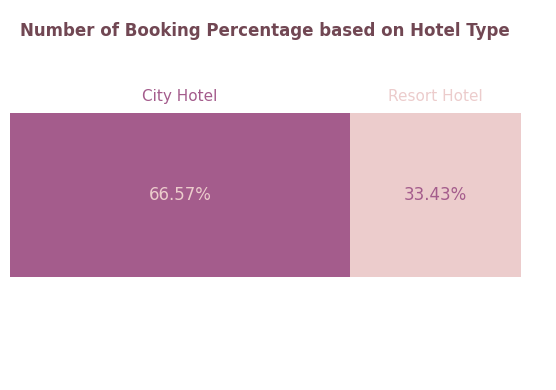

In [70]:
hotel = df_clean.groupby(['hotel']).agg({'hotel' : 'count'})
hotel = hotel.div(hotel.sum(), axis=1).T

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

hotel.plot(kind='barh', stacked=True, color = ['#a45c8c', '#eccccc'], ax = ax, width = 0.4)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)

plt.text(y = 0, x = (hotel['City Hotel'][0]/2),
             s = (str(round((hotel['City Hotel'][0]*100),2))) + '%',
             size = 12, ha='center', va='center', color = '#eccccc')

plt.text(y = 0, x = 1 - (hotel['Resort Hotel'][0]/2),
             s = (str(round((hotel['Resort Hotel'][0]*100),2))) + '%',
             size = 12, ha='center', va='center', color = '#a45c8c')

plt.text(y = 0.40, x = 0.02, s = 'Number of Booking Percentage based on Hotel Type',
         ha='left', va='center', color = '#714753', weight = 'bold', size=12)

plt.text(y = 0.24, x = (hotel['City Hotel'][0]/2), s = 'City Hotel', ha='center', va='center', color = '#a45c8c', weight = 'medium', size = 11)
plt.text(y = 0.24, x = 1 - (hotel['Resort Hotel'][0]/2), s = 'Resort Hotel', ha='center', va='center', color = '#eccccc', weight = 'medium', size = 11)

plt.legend().remove()

plt.tight_layout()
plt.show()

## **Monthly Hotel Booking Analysis Based on Hotel Type**

In [20]:
monthly_book = df_clean.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
monthly_book.columns = ['hotel_type','arrival_month','unique_year','total_booking']
monthly_book

,hotel_type,arrival_month,unique_year,total_booking
0,City Hotel,April,2,4926
1,City Hotel,August,2,7879
2,City Hotel,December,2,7563
3,City Hotel,February,2,4100
4,City Hotel,January,2,4319
5,City Hotel,July,2,8192
6,City Hotel,June,2,7464
7,City Hotel,March,2,3715
8,City Hotel,May,2,6420
9,City Hotel,November,2,7385


In [21]:
# Normalization of data by calculating the average number of orders per month in different years
monthly_book['Average_Booking'] = round(monthly_book['total_booking']/monthly_book['unique_year'])
monthly_book

,hotel_type,arrival_month,unique_year,total_booking,Average_Booking
0,City Hotel,April,2,4926,2463.0
1,City Hotel,August,2,7879,3940.0
2,City Hotel,December,2,7563,3782.0
3,City Hotel,February,2,4100,2050.0
4,City Hotel,January,2,4319,2160.0
5,City Hotel,July,2,8192,4096.0
6,City Hotel,June,2,7464,3732.0
7,City Hotel,March,2,3715,1858.0
8,City Hotel,May,2,6420,3210.0
9,City Hotel,November,2,7385,3692.0


In [22]:
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_book['month'] = monthly_book['arrival_month'].str[:3]
monthly_book['month'] = pd.Categorical(monthly_book['month'], categories=ordered_months, ordered=True)

monthly_book

,hotel_type,arrival_month,unique_year,total_booking,Average_Booking,month
0,City Hotel,April,2,4926,2463.0,Apr
1,City Hotel,August,2,7879,3940.0,Aug
2,City Hotel,December,2,7563,3782.0,Dec
3,City Hotel,February,2,4100,2050.0,Feb
4,City Hotel,January,2,4319,2160.0,Jan
5,City Hotel,July,2,8192,4096.0,Jul
6,City Hotel,June,2,7464,3732.0,Jun
7,City Hotel,March,2,3715,1858.0,Mar
8,City Hotel,May,2,6420,3210.0,May
9,City Hotel,November,2,7385,3692.0,Nov


In [23]:
# Visualising average monthly hotel booking for both hotels

In [24]:
df_monthly = df_clean.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df_monthly.columns = ['hotel_type','arrival_month','unique_year','total_booking']
df_monthly['avg_monthly_booking'] = df_monthly['total_booking'] / df_monthly['unique_year']

In [25]:
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_monthly['month'] = df_monthly['arrival_month'].str[:3]
df_monthly['month'] = pd.Categorical(df_monthly['month'], categories=ordered_months, ordered=True)
df_monthly

,hotel_type,arrival_month,unique_year,total_booking,avg_monthly_booking,month
0,City Hotel,April,2,4926,2463.000000,Apr
1,City Hotel,August,2,7879,3939.500000,Aug
2,City Hotel,December,2,7563,3781.500000,Dec
3,City Hotel,February,2,4100,2050.000000,Feb
4,City Hotel,January,2,4319,2159.500000,Jan
5,City Hotel,July,2,8192,4096.000000,Jul
6,City Hotel,June,2,7464,3732.000000,Jun
7,City Hotel,March,2,3715,1857.500000,Mar
8,City Hotel,May,2,6420,3210.000000,May
9,City Hotel,November,2,7385,3692.500000,Nov


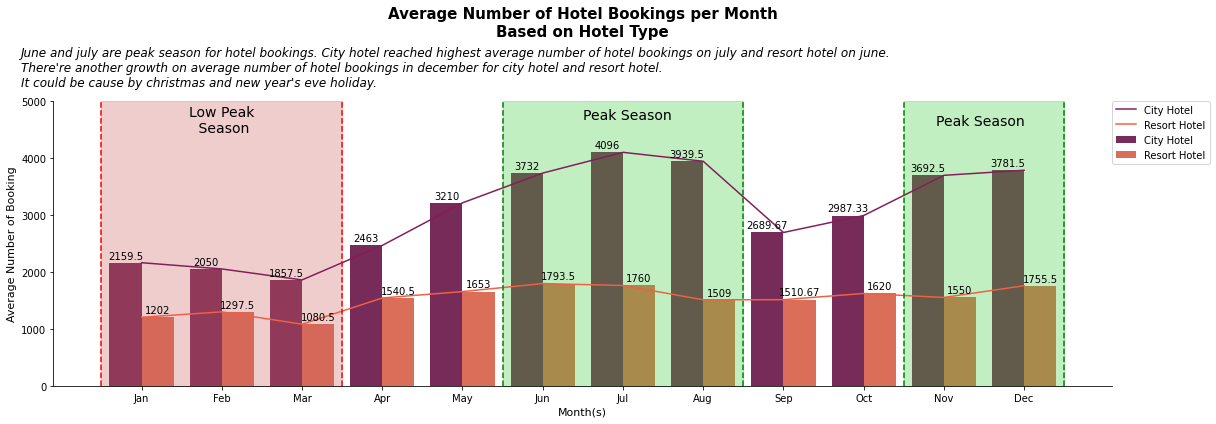

In [26]:
fig, ax = plt.subplots(figsize=(17, 6))
plt.title("Average Number of Hotel Bookings per Month\nBased on Hotel Type", fontsize=15, color='black', weight='bold', pad=65)
plt.text(x=-1.5, y=5250, s="June and july are peak season for hotel bookings. City hotel reached highest average number of hotel bookings on july and resort hotel on june.\nThere're another growth on average number of hotel bookings in december for city hotel and resort hotel.\nIt could be cause by christmas and new year's eve holiday.", fontsize=12, fontstyle='italic')
sns.barplot(x='month', y ='avg_monthly_booking', data=df_monthly, hue='hotel_type', palette='rocket')
sns.lineplot(x='month', y ='avg_monthly_booking', data=df_monthly, hue='hotel_type', palette='rocket')


plt.xlabel('Month(s)', fontsize=11)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Number of Booking', fontsize=11)
plt.ylim(0, 5000)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(4.5, ls='--', color='green')
plt.axvline(7.5, ls='--', color='green')
plt.stackplot(np.arange(4.5,8.5), [[5000]], color='limegreen', alpha=0.3)
plt.text(x=5.5, y=4750, s='Peak Season', fontsize=14, color='black', va='center')

plt.axvline(-0.5, ls='--', color='red')
plt.axvline(2.5, ls='--', color='red')
plt.stackplot(np.arange(-0.5,3.5), [[5000]], color='indianred', alpha=0.3)
plt.text(x=1, y=4450, s='Low Peak\n Season', fontsize=14, color='black', ha='center')

plt.axvline(9.5, ls='--', color='green')
plt.axvline(11.5, ls='--', color='green')
plt.stackplot(np.arange(9.5,12.5), [[5000]], color='limegreen', alpha=0.3)
plt.text(x=9.9, y=4650, s='Peak Season', fontsize=14, color='black', va='center')

sns.despine()
plt.tight_layout()

Key Takeaways :
- High peak season terjadi pada bulan juni - agustus untuk city & resort hotel. Ini dapat terjadi dikarenakan rentang bulan ini adalah libur semester ganjil untuk siswa di indonesia, rentang yang panjang ini dapat digunakan untuk liburan
- Kemudian Low peak season terjadi pada bulan Januari - Maret. Ini dapat terjadi karena rentang ini adalah libur semester ganjil dengan waktu libur yang singkat.
- Untuk dapat mengoptimaslisasi pemesanan kamar hotel, maka pihak hotel dapat menerapkan promo tahun baru sehingga pada low peak season dapat lebih optimal.

# **Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates**

## **Number of Booking Canceled Rate**

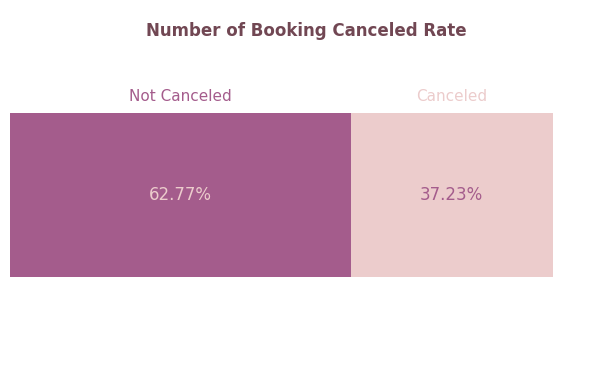

In [88]:
canceled = df_clean.groupby(['is_canceled']).agg({'is_canceled' : 'count'})
canceled = canceled.div(canceled.sum(), axis=1).T

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

hotel.plot(kind='barh', stacked=True, color = ['#a45c8c', '#eccccc'], ax = ax, width = 0.4)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)

plt.text(y = 0, x = (canceled[0][0]/2),
             s = (str(round((canceled[0][0]*100),2))) + '%',
             size = 12, ha='center', va='center', color = '#eccccc')

plt.text(y = 0, x = 1 - (canceled[1][0]/2),
             s = (str(round((canceled[1][0]*100),2))) + '%',
             size = 12, ha='center', va='center', color = '#a45c8c')

plt.text(y = 0.40, x = 0.25, s = 'Number of Booking Canceled Rate',
         ha='left', va='center', color = '#714753', weight = 'bold', size=12)

plt.text(y = 0.24, x = (canceled[0][0]/2), s = 'Not Canceled', ha='center', va='center', color = '#a45c8c', weight = 'medium', size = 11)
plt.text(y = 0.24, x = 1 - (canceled[1][0]/2), s = 'Canceled', ha='center', va='center', color = '#eccccc', weight = 'medium', size = 11)

plt.legend().remove()


plt.tight_layout()
plt.show()

## **Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates**

<AxesSubplot:xlabel='total_stays', ylabel='Count'>

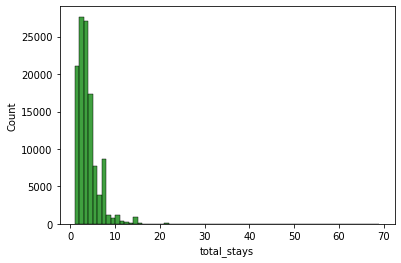

In [27]:
sns.histplot(data=df_clean, x="total_stays", binwidth=1, color="green")

In [37]:
duration_list = []
for i in df_clean['total_stays']:
    if i >= 1 and i <= 7:
        group = '1 Week'
    elif i >= 8 and i <= 14:
        group = '2 Weeks'
    elif i >= 15 and i <= 21:
        group = '3 Weeks'
    else: 
        group = '> 4 Weeks'
    duration_list.append(group)
df_clean['stay_duration_group'] = duration_list

In [38]:
hotel_stay = df_clean.groupby(['hotel', 'stay_duration_group', 'is_canceled']).agg({'adr':'count'}).reset_index()
hotel_stay.rename(columns={'adr':'num_booking'}, inplace=True)

#create sum booking column
df_sum = hotel_stay.groupby(['hotel', 'stay_duration_group']).agg({'num_booking':'sum'}).reset_index()
df_sum.rename(columns={'num_booking':'sum_booking'}, inplace=True)
hotel_stay = hotel_stay.merge(df_sum, on=['hotel', 'stay_duration_group'])

#create cancellation rate
hotel_stay['cancellation_rate'] = round((hotel_stay['num_booking']/hotel_stay['sum_booking'])*100, 2)
hotel_stay

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,cancellation_rate
0,City Hotel,1 Week,0,45348,77746,58.33
1,City Hotel,1 Week,1,32398,77746,41.67
2,City Hotel,2 Weeks,0,528,1086,48.62
3,City Hotel,2 Weeks,1,558,1086,51.38
4,City Hotel,3 Weeks,0,31,108,28.70
5,City Hotel,3 Weeks,1,77,108,71.30
6,City Hotel,> 4 Weeks,0,13,54,24.07
7,City Hotel,> 4 Weeks,1,41,54,75.93
8,Resort Hotel,1 Week,0,25760,35667,72.22
9,Resort Hotel,1 Week,1,9907,35667,27.78


In [39]:
#pick the data that hotels has been cancelled
hotel_stay_plot = hotel_stay[hotel_stay['is_canceled']==1].sort_values('stay_duration_group', ascending=True)
hotel_stay_plot

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,cancellation_rate
1,City Hotel,1 Week,1,32398,77746,41.67
9,Resort Hotel,1 Week,1,9907,35667,27.78
3,City Hotel,2 Weeks,1,558,1086,51.38
11,Resort Hotel,2 Weeks,1,1078,3731,28.89
5,City Hotel,3 Weeks,1,77,108,71.30
13,Resort Hotel,3 Weeks,1,79,169,46.75
7,City Hotel,> 4 Weeks,1,41,54,75.93
15,Resort Hotel,> 4 Weeks,1,46,108,42.59


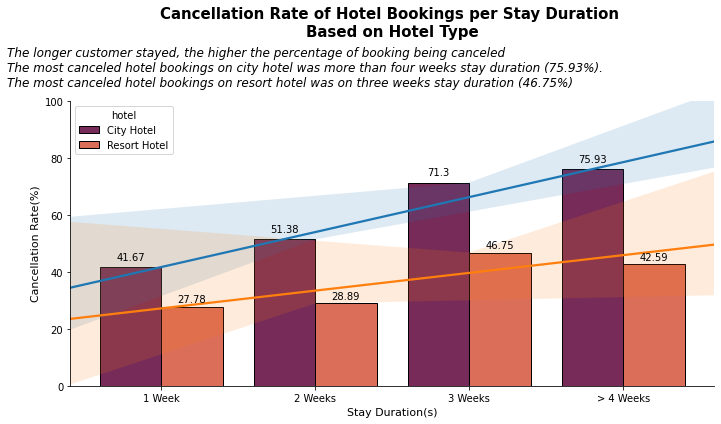

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Cancellation Rate of Hotel Bookings per Stay Duration \nBased on Hotel Type", fontsize=15, color='black', weight='bold', pad=65)
plt.text(x=-1, y=105, s="The longer customer stayed, the higher the percentage of booking being canceled\nThe most canceled hotel bookings on city hotel was more than four weeks stay duration (75.93%).\nThe most canceled hotel bookings on resort hotel was on three weeks stay duration (46.75%)", fontsize=12, fontstyle='italic')
sns.barplot(x='stay_duration_group', y='cancellation_rate', data=hotel_stay_plot, hue='hotel', edgecolor='black', palette='rocket')

sns.regplot(x=np.arange(0, len(hotel_stay_plot[hotel_stay_plot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=hotel_stay_plot[hotel_stay_plot['hotel'] == 'City Hotel'], scatter=False, label = 'Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(hotel_stay_plot[hotel_stay_plot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=hotel_stay_plot[hotel_stay_plot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)

plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

sns.despine()
plt.tight_layout()

Key Takeaways:

- Terlihat bila angka cancellation di dominasi oleh city hotel.
- Secara umum semakin lama durasi menginap maka angka cancellation akan semakin meningkat untuk kedua tipe hotel.
- Untuk dapat mengurangi angka cancellation rate pada kedua tipe hotel tampaknya perlu ada kebijkana pembayaran non-refund untuk customer dengan waktu menginap lebih dari 4 minggu 

# **Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**

In [98]:
lead_time_list=[]
for i in df_clean['lead_time']:
    if i <= 30:
        lead_group = '1 Month'
    elif i >= 31 and i <= 120:
        lead_group = '2-4 Months'
    elif i >= 121 and i <= 210:
        lead_group = '5-7 Months'
    elif i >= 211 and i <= 300:
        lead_group = '8-10 Months'
    elif i >= 311 and i <= 360:
        lead_group = '11-12 Months'
    else: 
        lead_group = '>12 Months'
    lead_time_list.append(lead_group)
df_clean['lead_time_group'] = lead_time_list

In [107]:
hotel_lead = df_clean.groupby(['hotel', 'lead_time_group', 'is_canceled']).agg({'adr':'count'}).reset_index()
hotel_lead.rename(columns={'adr':'num_booking'}, inplace=True)

#create sum booking column
df_sum = hotel_lead.groupby(['hotel', 'lead_time_group']).agg({'num_booking':'sum'}).reset_index()
df_sum.rename(columns={'num_booking':'sum_booking'}, inplace=True)
hotel_lead = hotel_lead.merge(df_sum, on=['hotel', 'lead_time_group'])

#create cancellation rate
hotel_lead['cancellation_rate'] = round((hotel_lead['num_booking']/hotel_lead['sum_booking'])*100, 2)
hotel_lead

,hotel,lead_time_group,is_canceled,num_booking,sum_booking,cancellation_rate
0,City Hotel,1 Month,0,17896,23072,77.57
1,City Hotel,1 Month,1,5176,23072,22.43
2,City Hotel,11-12 Months,0,567,2507,22.62
3,City Hotel,11-12 Months,1,1940,2507,77.38
4,City Hotel,2-4 Months,0,16430,28212,58.24
5,City Hotel,2-4 Months,1,11782,28212,41.76
6,City Hotel,5-7 Months,0,7309,14361,50.89
7,City Hotel,5-7 Months,1,7052,14361,49.11
8,City Hotel,8-10 Months,0,2763,7144,38.68
9,City Hotel,8-10 Months,1,4381,7144,61.32


In [108]:
#pick the data that hotels has been cancelled
hotel_lead_plot = hotel_lead[hotel_lead['is_canceled']==1]
hotel_lead_plot

,hotel,lead_time_group,is_canceled,num_booking,sum_booking,cancellation_rate
1,City Hotel,1 Month,1,5176,23072,22.43
3,City Hotel,11-12 Months,1,1940,2507,77.38
5,City Hotel,2-4 Months,1,11782,28212,41.76
7,City Hotel,5-7 Months,1,7052,14361,49.11
9,City Hotel,8-10 Months,1,4381,7144,61.32
11,City Hotel,>12 Months,1,2743,3698,74.18
13,Resort Hotel,1 Month,1,1976,15077,13.11
15,Resort Hotel,11-12 Months,1,395,908,43.50
17,Resort Hotel,2-4 Months,1,3999,11665,34.28
19,Resort Hotel,5-7 Months,1,2685,7271,36.93


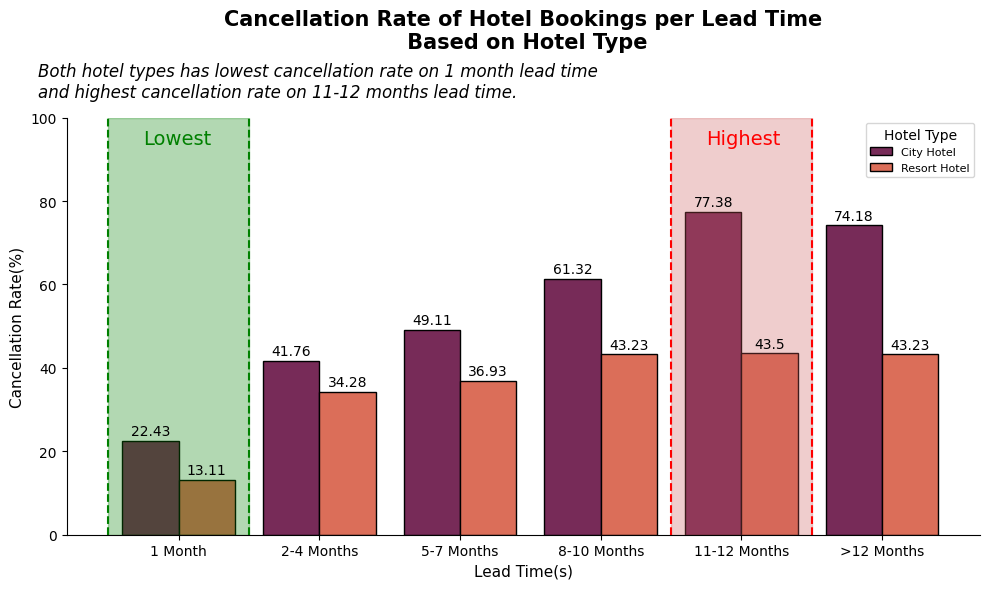

In [109]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Cancellation Rate of Hotel Bookings per Lead Time\n Based on Hotel Type", fontsize=15, color='black', weight='bold', pad=50)
plt.text(x=-1, y=105, s="Both hotel types has lowest cancellation rate on 1 month lead time\nand highest cancellation rate on 11-12 months lead time.", fontsize=12, fontstyle='italic')
sns.barplot(x='lead_time_group', y='cancellation_rate', data=hotel_lead_plot, hue='hotel', order=['1 Month', '2-4 Months', '5-7 Months', '8-10 Months', '11-12 Months', '>12 Months'], edgecolor='black', palette='rocket')

plt.xlabel('Lead Time(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(3.5, ls='--', color='red')
plt.axvline(4.5, ls='--', color='red')
plt.stackplot(np.arange(3.5,5.5), [[100]], color='indianred', alpha=0.3)
plt.text(x=3.75, y=95, s='Highest', fontsize=14, color='red', va='center')

plt.axvline(0.5, ls='--', color='green')
plt.axvline(-0.5, ls='--', color='green')
plt.stackplot(np.arange(-0.5,1.5), [[100]], color='green', alpha=0.3)
plt.text(x=-0.25, y=95, s='Lowest', fontsize=14, color='green', va='center')

plt.legend(title='Hotel Type', prop={'size':8}, loc=1)

sns.despine()
plt.tight_layout()

Key Takeaways:
- Secara umum semakin lama lead time maka kemungkinan pembatalan pesanan akan semakin tinggi

- Guna mengurangi angka pembatalan pihak hotel dapat menerapkan maksimum lead time & deposit non refund. Menggabungkan kebijakan jenis deposit non refund dan maksimum lead time dapat membantu hotel untuk mendapatkan customer tanpa potensi pembatalan.

- Hotel dapat menerapkan deposit non refund untuk pemesanan lebih dari 210 hari atau diatas 8 bulan untuk city hotel dikarenakan pada visualisasi terlihat tingkat pembatalan sudah lebih dari 50% dan lebih riskan akan terjadinya pembatalan.